In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import json

In [3]:
df_path = "./USvideos.csv"

In [4]:
df = pd.read_csv(df_path)

In [5]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


# Analysing the raw data

In [30]:
# Investigating the first entry.
df.head(1).transpose()

,0
video_id,2kyS6SvSYSE
trending_date,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
category_id,22
publish_time,2017-11-13T17:13:01.000Z
tags,SHANtell martin
views,748374
likes,57527
dislikes,2966


In [31]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [32]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [33]:
# Number of columns
df.shape[1]

16

In [34]:
# Number of video recorded in the table
df.shape[0]-1

40948

In [35]:
# Number of unique videos in the table
df['video_id'].unique().shape[0]

6351

# Data Cleaning

In [36]:
df["description"] = df["description"].fillna(value="")

# Visualisations

In [37]:
# minimum view count
df['views'].min()

549

In [38]:
# maximum view count
df['views'].max()

225211923

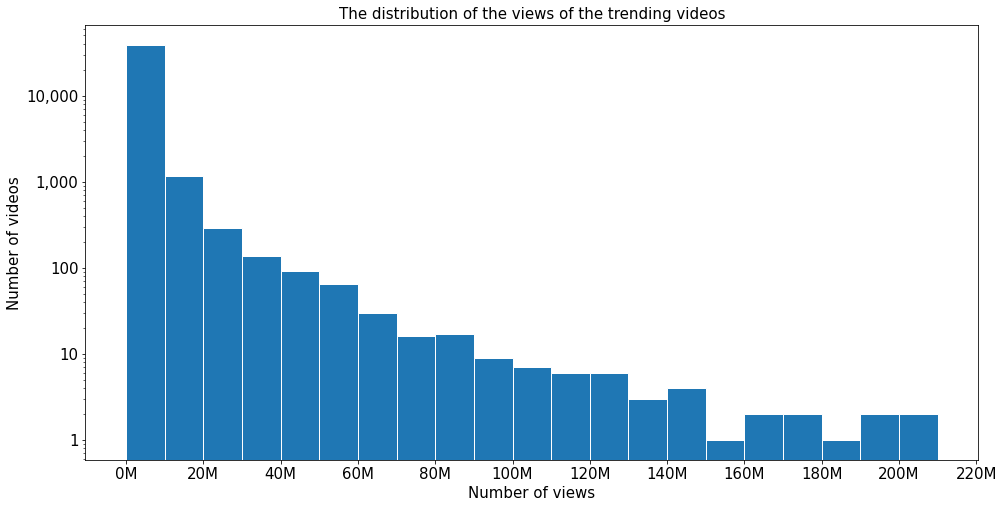

In [135]:
fig = df['views'].plot.hist(logy = True,
                            bins=np.arange(0, 220e6, 10e6)-0.5,
                            lw = 1, 
                            ec = 'white',
                            figsize = (16,8))

plt.yticks(fontsize = 15)
plt.xticks(ind,fontsize = 15)
plt.title('The distribution of the views of the trending videos', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of trending videos', fontsize = 15)

formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6));
fig.xaxis.set_major_locator(ticker.MultipleLocator(20000000));
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'));

In [40]:
df[df['views'] < 10_000_000].shape[0] / df.shape[0] * 100

95.48706928130113

In [41]:
df[df['views'] < 100_000_000].shape[0] / df.shape[0] * 100

99.90231751691128

In [7]:
cdf = df.drop_duplicates(subset=['video_id'])

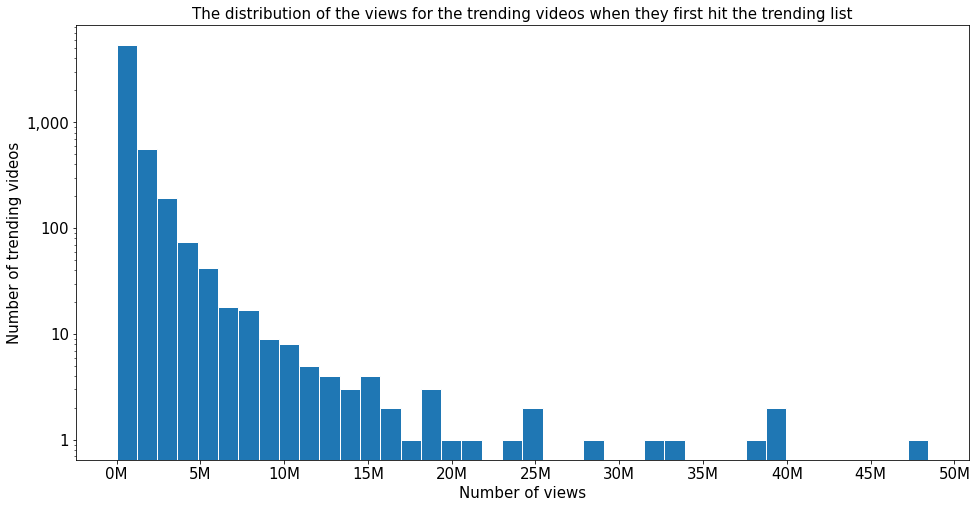

In [147]:
fig = cdf['views'].plot.hist(logy = True,
                            bins = 40,
                            lw = 1, 
                            ec = 'white',
                            figsize = (16,8))

plt.yticks(fontsize = 15)
plt.xticks(ind,fontsize = 15)
plt.title('The distribution of the views for the trending videos when they first hit the trending list', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of trending videos', fontsize = 15)

fig.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
def millions(x, pos):
    return '{}M'.format(int(x / 1000000))
fig.xaxis.set_major_locator(ticker.MultipleLocator(5000000))
fig.xaxis.set_major_formatter(ticker.FuncFormatter(millions));

In [44]:
'{:,.0f}'.format(cdf['views'].quantile(q=0.9))

'1,685,423'

In [45]:
'{:,.0f}'.format(cdf['views'].quantile(q=0.95))

'2,801,378'

In [46]:
# min views
'{:,.0f}'.format(cdf['views'].min())

'549'

In [47]:
cdf[cdf['views'] == 549]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14335,y6KYFcta4SE,18.26.01,"1 dead, others injured after Ky. school shooting",Newsy,25,2018-01-23T15:30:01.000Z,"shooting|""kentucky""|""breaking news""|""u.s. news...",549,9,0,5,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...


In [48]:
cdf['views'].describe().apply(lambda x: format(x, 'f'))

count        6351.000000
mean       758209.564478
std       1928993.099630
min           549.000000
25%         83511.000000
50%        270902.000000
75%        751266.500000
max      48431654.000000
Name: views, dtype: object

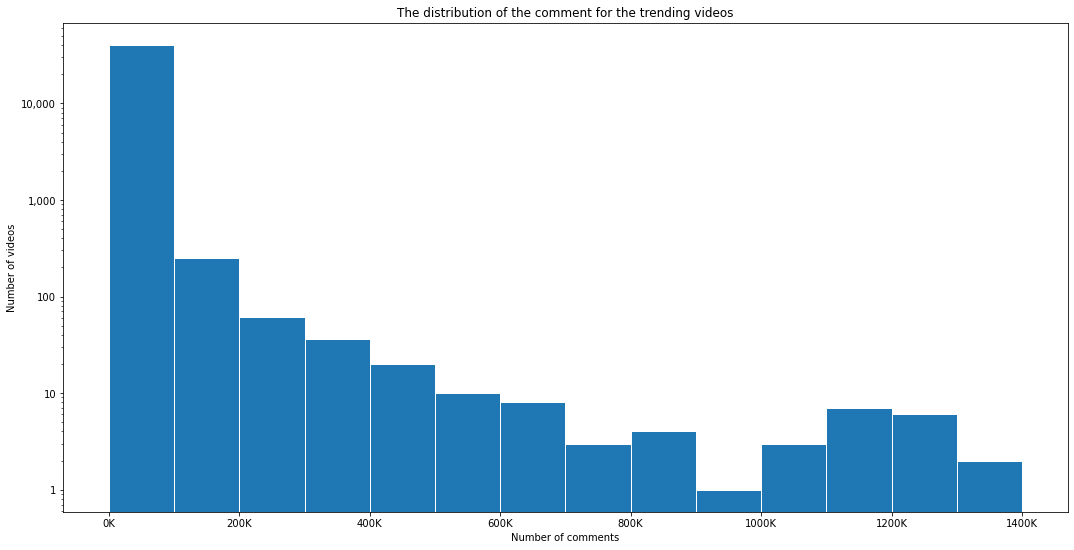

In [49]:
fig = df['comment_count'].plot.hist(logy = True,
                            bins = np.arange(0, 1.5e6, 1e5)-0.5,
                            lw = 1, 
                            ec = 'white',
                            figsize=(18,9));

plt.title('The distribution of the comment for the trending videos', fontsize = 12);
plt.xlabel('Number of comments');
plt.ylabel('Number of videos');

formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x/1e3))
fig.xaxis.set_major_locator(ticker.MultipleLocator(200000))
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

In [50]:
df[df['comment_count'] < 100_000].shape[0] / df.shape[0] * 100

98.99142836210896

In [51]:
df['comment_count'].quantile(q=0.9)

16959.200000000004

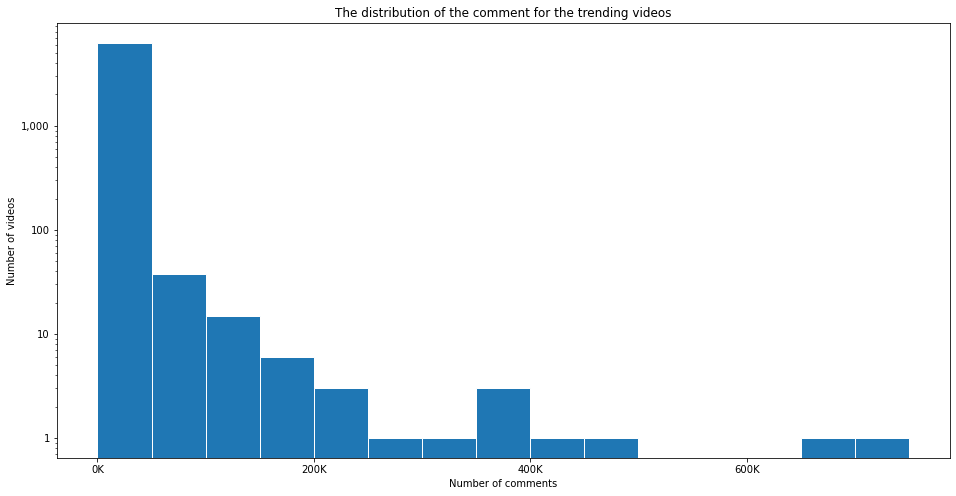

In [52]:
cdf = df.drop_duplicates(subset=['video_id'])
fig = cdf['comment_count'].plot.hist(logy = True,
                            bins = np.arange(0, 0.8e6, 5e4)-0.5,
                            lw = 1, 
                            ec = 'white',
                            figsize=(16,8));

plt.title('The distribution of the comment for the trending videos', fontsize = 12);
plt.xlabel('Number of comments');
plt.ylabel('Number of videos');

formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x/1e3))
fig.xaxis.set_major_locator(ticker.MultipleLocator(200000))
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

In [53]:
'{:,.0f}'.format(cdf['comment_count'].quantile(q=0.7))

'2,213'

In [54]:
'{:,.0f}'.format(cdf['comment_count'].quantile(q=0.9))

'8,311'

In [55]:
'{:,.0f}'.format(cdf['comment_count'].quantile(q=0.99))

'55,995'

In [56]:
'{:,.0f}'.format(cdf['comment_count'].min())

'0'

In [57]:
'{:,.0f}'.format(cdf[cdf['comment_count'] != 0]['comment_count'].min())

'1'

In [58]:
cdf[cdf['comment_count'] == 1]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
163,oB3SAI2oCqk,17.14.11,Caterham Chris Hoy 60 Second Donut Challenge,Caterham Cars,2,2017-11-09T09:59:31.000Z,"Caterham|""Chris Hoy""|""Caterham Seven""|""Avon Ty...",4850,22,1,1,https://i.ytimg.com/vi/oB3SAI2oCqk/default.jpg,False,False,False,Olympic legend Sir Chris Hoy is no stranger wh...
935,7xhxjcejONk,17.18.11,Star Wars & littleBits Droid Inventor Kit: Mov...,littleBits Electronics,28,2017-11-15T16:18:17.000Z,"littleBits|""starwars""|""inventorswanted""|""droid...",1387,15,1,1,https://i.ytimg.com/vi/7xhxjcejONk/default.jpg,False,False,False,"A kid inventor movement is afoot, with the Dro..."
1105,QaASZecxQww,17.19.11,[HD] Julia Roberts Interview On Today Show 11/...,NARLtv,24,2017-11-16T14:11:06.000Z,"julia roberts|""interview""|""today""|""show""|""2017...",3545,18,3,1,https://i.ytimg.com/vi/QaASZecxQww/default.jpg,False,False,False,Julia Roberts interview on Today Show 11/16/2017
1114,g3VgrgV3kFk,17.19.11,John Thrasher: Jimbo's here forever,Single Shot,17,2017-11-16T22:50:00.000Z,"fsu|""florida state""|""Seminoles""|""Seminole""|""no...",920,3,1,1,https://i.ytimg.com/vi/g3VgrgV3kFk/default.jpg,False,False,False,In an interview with Tia Mitchell of the Flori...
1129,aHsfKnrNCG4,17.19.11,mad eye moody - moving eyeball prop,daronjay,10,2017-11-14T13:25:56.000Z,[none],3390,9,0,1,https://i.ytimg.com/vi/aHsfKnrNCG4/default.jpg,False,False,False,
1298,KkhR9z6pAMs,17.20.11,Mali Music and Jennifer Hudson are recording a...,Tamika Hall,24,2013-03-22T22:46:47.000Z,"mali music and jennifer hudson|""jennifer hudso...",4970,13,1,1,https://i.ytimg.com/vi/KkhR9z6pAMs/default.jpg,False,False,False,It has been confirmed...Mali Music and Jennife...
1315,WbYqfpnw7sE,17.20.11,The greatest best man speech from 10 year old ...,Kevin Rabatin,22,2017-11-15T03:34:28.000Z,[none],1820,2,0,1,https://i.ytimg.com/vi/WbYqfpnw7sE/default.jpg,False,False,False,To use this video in a commercial player or in...
1940,qvLyNeMGdR4,17.23.11,Ford Thunderbird SC commercial (1989),John Sellars,24,2016-12-28T05:34:48.000Z,"1989|""80s commercial""|""kamr""|""amarillo""|""texas...",1480,5,0,1,https://i.ytimg.com/vi/qvLyNeMGdR4/default.jpg,False,False,False,"This commercial aired on January 7, 1989 on Am..."
2120,aXLS_WDIugk,17.24.11,Jackson Pollock in 60 seconds,Royal Academy of Arts,24,2016-11-10T19:37:00.000Z,"Royal Academy of Arts|""art""|""visual arts""|""Jac...",17164,47,1,1,https://i.ytimg.com/vi/aXLS_WDIugk/default.jpg,False,False,False,Our Artistic Director Tim Marlow gives a quick...
4943,kqWQFnH6h-E,17.08.12,The Real Reason Tyrese Married His Ex Wife,HOTSPOTATL,24,2017-12-04T19:06:26.000Z,"WHTA|""tyrese""|""Hot 107.9""|""HotSpotATL""",2929,13,4,1,https://i.ytimg.com/vi/kqWQFnH6h-E/default.jpg,False,False,False,Tyrese stopped by the RSMS to clear the air ab...


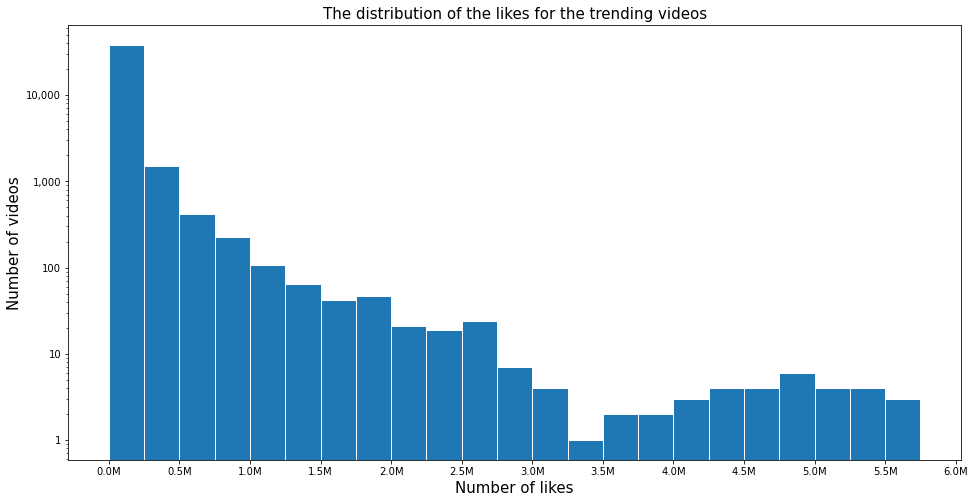

In [59]:
fig = df['likes'].plot.hist(logy = True,
                            bins=np.arange(0, 6e6, 2.5e5)-0.5,
                            lw = 1, 
                            ec = 'white',
                            figsize=(16,8))

plt.title('The distribution of the likes for the trending videos', fontsize = 15)
plt.xlabel('Number of likes', fontsize = 15)
plt.ylabel('Number of videos', fontsize = 15)

formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
fig.xaxis.set_major_locator(ticker.MultipleLocator(500000))
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

In [60]:
df[df['likes'] < 500_000].shape[0] / df.shape[0] * 100

97.52619111577816

In [61]:
df[df['likes'] < 100_000].shape[0] / df.shape[0] * 100


83.91657915944222

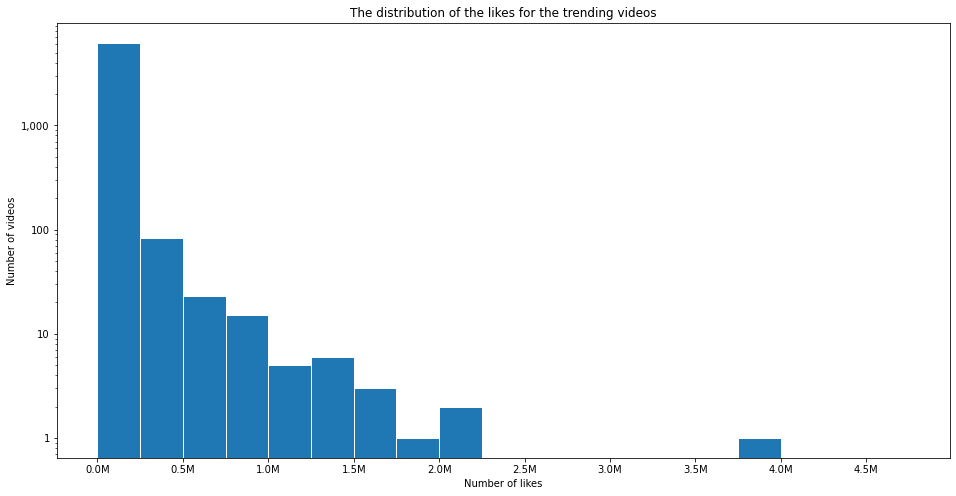

In [62]:
cdf = df.drop_duplicates(subset=['video_id'])
fig = cdf['likes'].plot.hist(logy = True,
                            bins=np.arange(0, 5e6, 2.5e5)-0.5,
                            lw = 1, 
                            ec = 'white',
                            figsize=(16,8))

plt.title('The distribution of the likes for the trending videos', fontsize = 12)
plt.xlabel('Number of likes')
plt.ylabel('Number of videos')

formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
fig.xaxis.set_major_locator(ticker.MultipleLocator(500000))
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

In [63]:
cdf['likes'].describe()

count    6.351000e+03
mean     3.449357e+04
std      1.162439e+05
min      0.000000e+00
25%      1.908000e+03
50%      7.987000e+03
75%      2.516300e+04
max      3.880071e+06
Name: likes, dtype: float64

In [64]:
'{:,.0f}'.format(cdf['likes'].quantile(q=0.7))

'19,761'

In [65]:
'{:,.0f}'.format(cdf['likes'].quantile(q=0.9))

'73,765'

In [66]:
'{:,.0f}'.format(cdf['likes'].quantile(q=0.99))

'419,894'

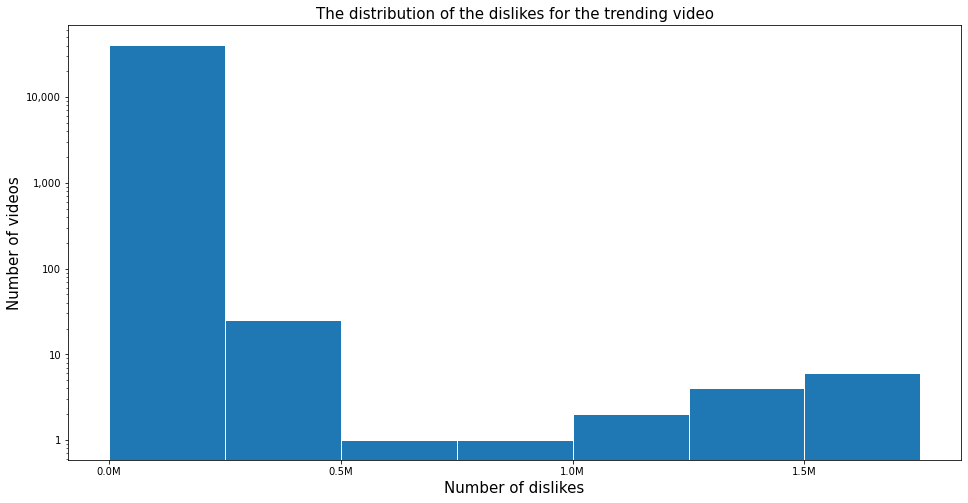

In [67]:
fig = df['dislikes'].plot.hist(logy = True,
                            bins = np.arange(0, 2e6, 2.5e5)-0.5,
                            lw = 1, 
                            ec = 'white',
                            figsize = (16,8))

plt.title('The distribution of the dislikes for the trending video', fontsize = 15)
plt.xlabel('Number of dislikes', fontsize = 15)
plt.ylabel('Number of videos', fontsize = 15)

formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
fig.xaxis.set_major_locator(ticker.MultipleLocator(500000))
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))

In [68]:
df[df['dislikes'] < 100_000].shape[0] / df.shape[0] * 100

99.56775501233241

In [69]:
df[df['dislikes'] < 10_000].shape[0] / df.shape[0] * 100

93.88996068280055

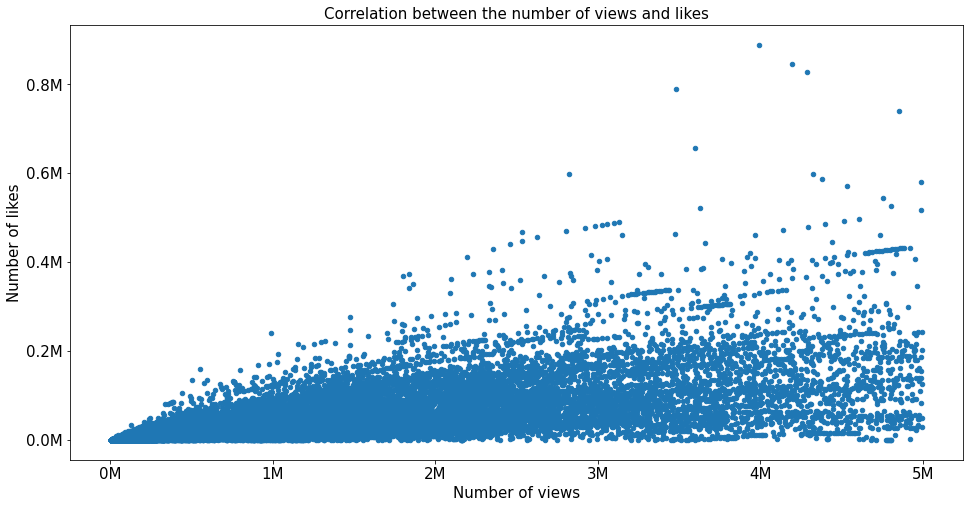

In [140]:
fig = df[df['views'] < 5000000].plot.scatter(x = "views", y = "likes", figsize = (16,8))

plt.yticks(fontsize = 15)
plt.xticks(ind,fontsize = 15)
plt.title('Correlation between the number of views and likes', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of likes', fontsize = 15)

formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6));
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));

formatter2 = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6));
fig.yaxis.set_major_formatter(ticker.FuncFormatter(formatter2));

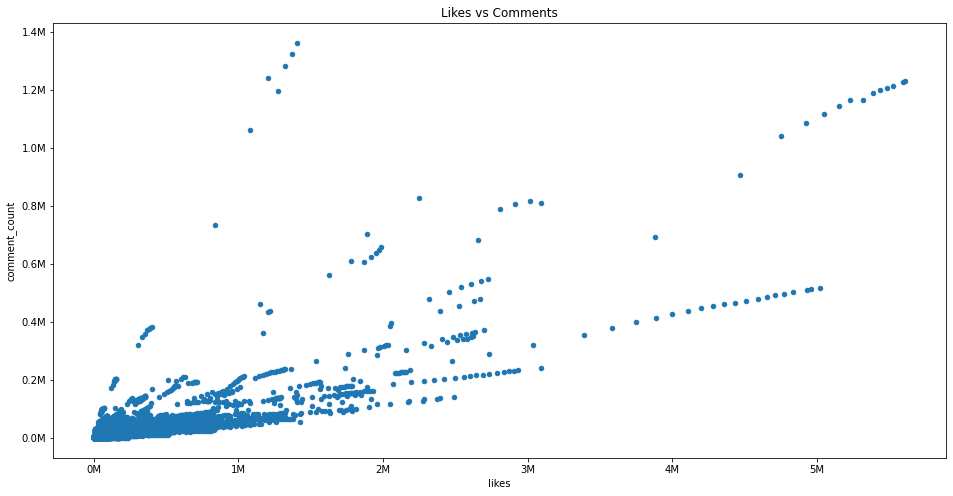

In [71]:
fig = df.plot.scatter(x = "likes", y = "comment_count", figsize = (16,8))

plt.title('Likes vs Comments', fontsize = 12)

formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6));
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));

formatter2 = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6));
fig.yaxis.set_major_formatter(ticker.FuncFormatter(formatter2));

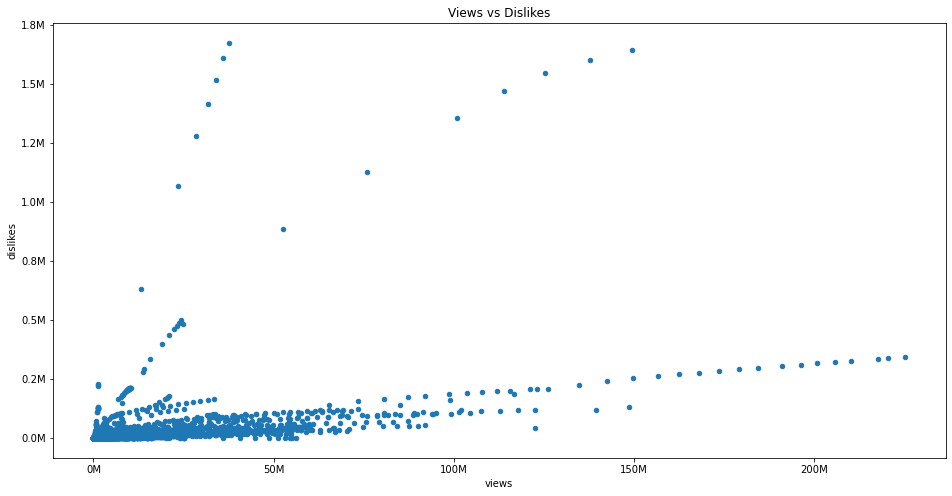

In [72]:
fig = df.plot.scatter(x = "views", y = "dislikes", figsize = (16,8))

plt.title('Views vs Dislikes', fontsize = 12)

formatter1 = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6));
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter1));

formatter2 = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6));
fig.yaxis.set_major_formatter(ticker.FuncFormatter(formatter2));

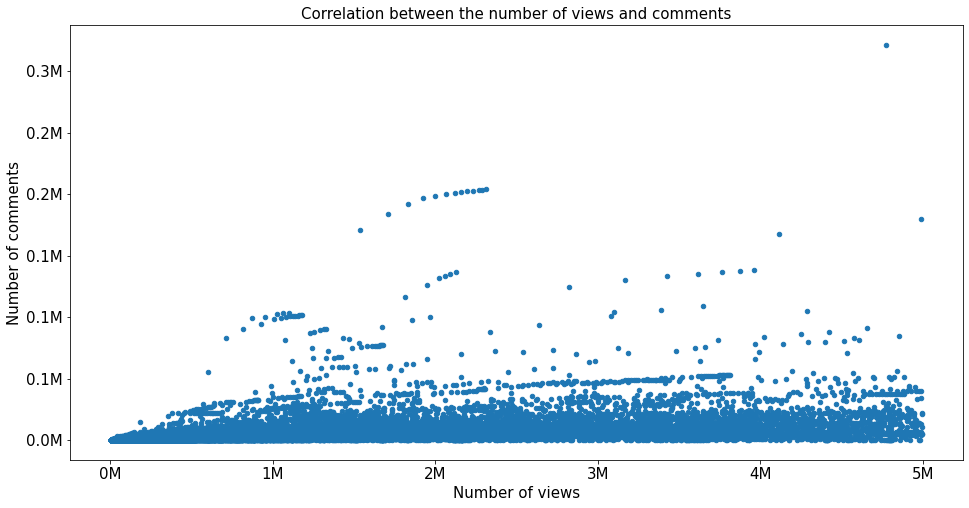

In [7]:
fig = df[df['views'] < 5000000].plot.scatter(x = "views", y = "comment_count", figsize = (16,8))

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Correlation between the number of views and comments', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of comments', fontsize = 15)

formatter1 = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6));
fig.xaxis.set_major_formatter(ticker.FuncFormatter(formatter1));

formatter2 = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6));
fig.yaxis.set_major_formatter(ticker.FuncFormatter(formatter2));

In [74]:
video_counts = pd.read_csv(df_path, index_col=0)

Text(0, 0.5, 'Channels')

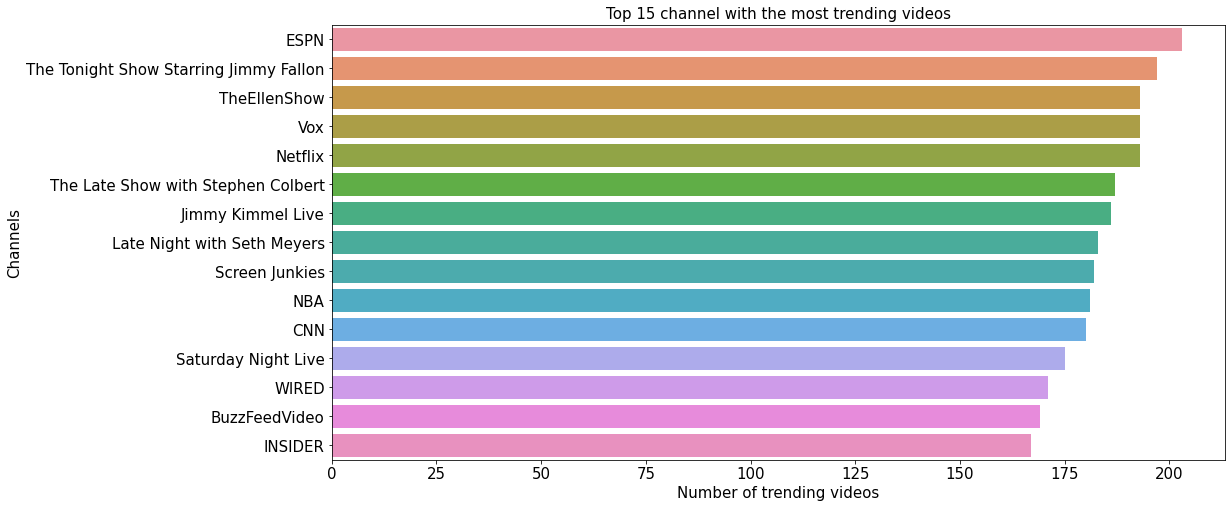

In [146]:
fig, ax = plt.subplots(figsize=(16,8))
tdf = df['channel_title'].value_counts(sort=True, ascending=False).head(15)
sns.barplot(tdf.values, tdf.index.values, ax=ax)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title("Top 15 channel with the most trending videos", fontsize = 15)
plt.xlabel("Number of trending videos", fontsize = 15)
plt.ylabel("Channels", fontsize = 15)

#fig = df['channel_title'].value_counts().head(15).plot.bar()
#fig.set_title('Top 15 channels with the most trending videos ', fontsize = 12)
#plt.xlabel('Channel')
#plt.ylabel('Number of videos')

In [100]:
df[df["channel_title"] == "ESPN"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,published_day,published_hour,title_length,description_length
193,agKDPntMv-E,17.14.11,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,2017-11-08 15:59:06+00:00,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,...,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,Sports,Wednesday,15,93,867
220,KJ12FVmumeA,17.15.11,Stephen A. Smith: Jay Cutler is a 'disease' | ...,ESPN,17,2017-11-14 16:28:34+00:00,"espn|""espn live""|""stephen a smith""|""stephen a....",200235,1197,108,...,https://i.ytimg.com/vi/KJ12FVmumeA/default.jpg,False,False,False,First Take's Stephen A. Smith goes on an epic ...,Sports,Tuesday,16,63,872
447,KJ12FVmumeA,17.16.11,Stephen A. Smith: Jay Cutler is a 'disease' | ...,ESPN,17,2017-11-14 16:28:34+00:00,"espn|""espn live""|""stephen a smith""|""stephen a....",281868,1546,245,...,https://i.ytimg.com/vi/KJ12FVmumeA/default.jpg,False,False,False,First Take's Stephen A. Smith goes on an epic ...,Sports,Tuesday,16,63,872
659,uN9zBcweN4M,17.17.11,NBA Countdown debates if Ben Simmons is the be...,ESPN,17,2017-11-16 03:16:52+00:00,"espn|""espn live""|""nba countdown""|""nba""|""basket...",113926,1026,37,...,https://i.ytimg.com/vi/uN9zBcweN4M/default.jpg,False,False,False,The NBA Countdown crew debates if Philadelphia...,Sports,Thursday,3,94,873
894,uN9zBcweN4M,17.18.11,NBA Countdown debates if Ben Simmons is the be...,ESPN,17,2017-11-16 03:16:52+00:00,"espn|""espn live""|""nba countdown""|""nba""|""basket...",120991,1060,42,...,https://i.ytimg.com/vi/uN9zBcweN4M/default.jpg,False,False,False,The NBA Countdown crew debates if Philadelphia...,Sports,Thursday,3,94,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39963,btE8mDfEF34,18.10.06,Stephen A. on Cavaliers' NBA Finals Game 4: 'I...,ESPN,17,2018-06-09 04:30:06+00:00,"espn|""espn live""|""stephen a""|""on""|""cavaliers""|...",1150627,9737,811,...,https://i.ytimg.com/vi/btE8mDfEF34/default.jpg,False,False,False,Stephen A. Smith joins SportsCenter with Scott...,Sports,Saturday,4,96,852
40165,btE8mDfEF34,18.11.06,Stephen A. on Cavaliers' NBA Finals Game 4: 'I...,ESPN,17,2018-06-09 04:30:06+00:00,"espn|""espn live""|""stephen a""|""on""|""cavaliers""|...",1215945,10083,856,...,https://i.ytimg.com/vi/btE8mDfEF34/default.jpg,False,False,False,Stephen A. Smith joins SportsCenter with Scott...,Sports,Saturday,4,96,852
40363,3tYpfAPVEs0,18.12.06,Stephen A. and Max react to LeBron James' brok...,ESPN,17,2018-06-11 14:43:53+00:00,"espn|""espn live""|""lebron broken hand""|""lebron ...",746980,6918,950,...,https://i.ytimg.com/vi/3tYpfAPVEs0/default.jpg,False,False,False,First Take's Stephen A. Smith and Max Kellerma...,Sports,Monday,14,73,815
40570,3tYpfAPVEs0,18.13.06,Stephen A. and Max react to LeBron James' brok...,ESPN,17,2018-06-11 14:43:53+00:00,"espn|""espn live""|""lebron broken hand""|""lebron ...",931064,7914,1152,...,https://i.ytimg.com/vi/3tYpfAPVEs0/default.jpg,False,False,False,First Take's Stephen A. Smith and Max Kellerma...,Sports,Monday,14,73,815


In [97]:
df[df["channel_title"] == "The Tonight Show Starring Jimmy Fallon"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,published_day,published_hour,title_length,description_length
206,gjXrm2Q-te4,17.15.11,Jimmy Fallon Pays Tribute to His Mother Gloria,The Tonight Show Starring Jimmy Fallon,23,2017-11-14 04:55:24+00:00,"Jimmy Fallon|""Tonight Show Starring Jimmy Fall...",1611093,58474,837,...,https://i.ytimg.com/vi/gjXrm2Q-te4/default.jpg,False,False,False,"Jimmy celebrates the life and love of his mom,...",Comedy,Tuesday,4,46,1202
422,gjXrm2Q-te4,17.16.11,Jimmy Fallon Pays Tribute to His Mother Gloria,The Tonight Show Starring Jimmy Fallon,23,2017-11-14 04:55:24+00:00,"Jimmy Fallon|""Tonight Show Starring Jimmy Fall...",2223948,76806,1169,...,https://i.ytimg.com/vi/gjXrm2Q-te4/default.jpg,False,False,False,"Jimmy celebrates the life and love of his mom,...",Comedy,Tuesday,4,46,1202
623,t1Liix4gi7k,17.17.11,Gigi Hadid Gives Jimmy the Only Men's Pair of ...,The Tonight Show Starring Jimmy Fallon,23,2017-11-16 05:13:33+00:00,"The Tonight Show|""Jimmy Fallon""|""Gigi Hadid""|""...",1035804,18816,737,...,https://i.ytimg.com/vi/t1Liix4gi7k/default.jpg,False,False,False,Gigi Hadid chats with Jimmy about her obsessio...,Comedy,Thursday,5,67,1357
810,ZpS-w6BxN-U,17.18.11,Search Party with Tim McGraw and Faith Hill,The Tonight Show Starring Jimmy Fallon,23,2017-11-17 10:00:03+00:00,"The Tonight Show|""Jimmy Fallon""|""Search Party""...",178325,1641,83,...,https://i.ytimg.com/vi/ZpS-w6BxN-U/default.jpg,False,False,False,Faith Hill teams up with Jimmy as they face of...,Comedy,Friday,10,43,1302
1007,tr7I4vokl78,17.19.11,Justin Verlander and Kate Upton Missed Their W...,The Tonight Show Starring Jimmy Fallon,23,2017-11-18 12:00:04+00:00,"The Tonight Show|""Jimmy Fallon""|""Justin Verlan...",195386,2544,186,...,https://i.ytimg.com/vi/tr7I4vokl78/default.jpg,False,False,False,Houston Astros pitcher Justin Verlander and su...,Comedy,Saturday,12,80,1333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40101,amtC28yfYCM,18.10.06,Mindy Kaling Is Mad She Wasn't Invited to the ...,The Tonight Show Starring Jimmy Fallon,23,2018-05-24 08:00:00+00:00,"The Tonight Show|""Jimmy Fallon""|""Mindy Kaling""...",577148,6489,379,...,https://i.ytimg.com/vi/amtC28yfYCM/default.jpg,False,False,False,Mindy Kaling chats with Jimmy about his though...,Comedy,Thursday,8,59,1295
40302,amtC28yfYCM,18.11.06,Mindy Kaling Is Mad She Wasn't Invited to the ...,The Tonight Show Starring Jimmy Fallon,23,2018-05-24 08:00:00+00:00,"The Tonight Show|""Jimmy Fallon""|""Mindy Kaling""...",578697,6501,381,...,https://i.ytimg.com/vi/amtC28yfYCM/default.jpg,False,False,False,Mindy Kaling chats with Jimmy about his though...,Comedy,Thursday,8,59,1295
40517,amtC28yfYCM,18.12.06,Mindy Kaling Is Mad She Wasn't Invited to the ...,The Tonight Show Starring Jimmy Fallon,23,2018-05-24 08:00:00+00:00,"The Tonight Show|""Jimmy Fallon""|""Mindy Kaling""...",582372,6533,381,...,https://i.ytimg.com/vi/amtC28yfYCM/default.jpg,False,False,False,Mindy Kaling chats with Jimmy about his though...,Comedy,Thursday,8,59,1295
40717,amtC28yfYCM,18.13.06,Mindy Kaling Is Mad She Wasn't Invited to the ...,The Tonight Show Starring Jimmy Fallon,23,2018-05-24 08:00:00+00:00,"The Tonight Show|""Jimmy Fallon""|""Mindy Kaling""...",585034,6565,381,...,https://i.ytimg.com/vi/amtC28yfYCM/default.jpg,False,False,False,Mindy Kaling chats with Jimmy about his though...,Comedy,Thursday,8,59,1295


In [99]:
df[df["channel_title"] == "TheEllenShow"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,published_day,published_hour,title_length,description_length
106,yuBqWcSKrCk,17.14.11,"Owen Wilson on Meeting Julia Roberts, and Tand...",TheEllenShow,24,2017-11-10 14:00:10+00:00,"owen wilson|""owen""|""wilson""|""julia roberts""|""t...",304926,3305,130,...,https://i.ytimg.com/vi/yuBqWcSKrCk/default.jpg,False,False,False,"Movie star Owen Wilson was back on the show, a...",Entertainment,Friday,14,55,179
239,Z3OZyb2iWqQ,17.15.11,Colin Farrell Dishes on Rendezvous with Girlfr...,TheEllenShow,24,2017-11-14 14:00:32+00:00,"Colin|""Farrell""|""Colin Farrell""|""The killing o...",137860,1950,64,...,https://i.ytimg.com/vi/Z3OZyb2iWqQ/default.jpg,False,False,False,Ellen's friend Colin Farrell explained how he ...,Entertainment,Tuesday,14,50,128
411,8hKbIhrb1WU,17.16.11,Kim Kardashian Lets Gender of Third Child Slip,TheEllenShow,24,2017-11-15 14:00:02+00:00,"kim|""kardashian""|""kim kardashian west""|""kim k""...",1559003,29898,884,...,https://i.ytimg.com/vi/8hKbIhrb1WU/default.jpg,False,False,False,Kim Kardashian accidentally revealed the gende...,Entertainment,Wednesday,14,46,140
622,eDelIZDzmwQ,17.17.11,Blake Shelton Is Milking His Title of Sexiest ...,TheEllenShow,24,2017-11-16 14:00:04+00:00,"Blake|""Shelton""|""Blake Shelton""|""Country music...",340348,5474,372,...,https://i.ytimg.com/vi/eDelIZDzmwQ/default.jpg,False,False,False,Country superstar Blake Shelton is People's Se...,Entertainment,Thursday,14,55,128
819,mNhxFzR25Rs,17.18.11,Lin-Manuel Miranda and Macey Hensley Face Off ...,TheEllenShow,24,2017-11-17 14:00:05+00:00,"Cheerios|""Lin-Manuel Miranda""|""Lin-Manuel""|""Mi...",185707,7018,57,...,https://i.ytimg.com/vi/mNhxFzR25Rs/default.jpg,False,False,False,Hamilton creator Lin-Manuel Miranda may have m...,Entertainment,Friday,14,66,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40007,-0CMnp02rNY,18.10.06,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00+00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",792613,9720,330,...,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,False,False,False,Ocean's 8 star Mindy Kaling dished on bringing...,Entertainment,Monday,13,74,101
40208,-0CMnp02rNY,18.11.06,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00+00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",800359,9773,332,...,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,False,False,False,Ocean's 8 star Mindy Kaling dished on bringing...,Entertainment,Monday,13,74,101
40364,hKNRieaN0ZI,18.12.06,Shaq's Babysitting Gig Led to His Google Riches,TheEllenShow,24,2018-06-11 13:00:10+00:00,"ellen|""ellen degeneres""|""the ellen show""|""seas...",206975,4233,59,...,https://i.ytimg.com/vi/hKNRieaN0ZI/default.jpg,False,False,False,Shaquille O'Neal explained to Ellen how a brie...,Entertainment,Monday,13,47,147
40566,hKNRieaN0ZI,18.13.06,Shaq's Babysitting Gig Led to His Google Riches,TheEllenShow,24,2018-06-11 13:00:10+00:00,"ellen|""ellen degeneres""|""the ellen show""|""seas...",462328,7191,150,...,https://i.ytimg.com/vi/hKNRieaN0ZI/default.jpg,False,False,False,Shaquille O'Neal explained to Ellen how a brie...,Entertainment,Monday,13,47,147


In [77]:
with open("datasets_4549_466349_US_category_id.json") as datafile:
    categories = json.load(datafile)["items"]

categories_dict = {}
for category in categories:
    categories_dict[int(category["id"])] = category["snippet"]["title"]
df['category_name'] = df['category_id'].map(categories_dict)

Text(0, 0.5, 'Categories')

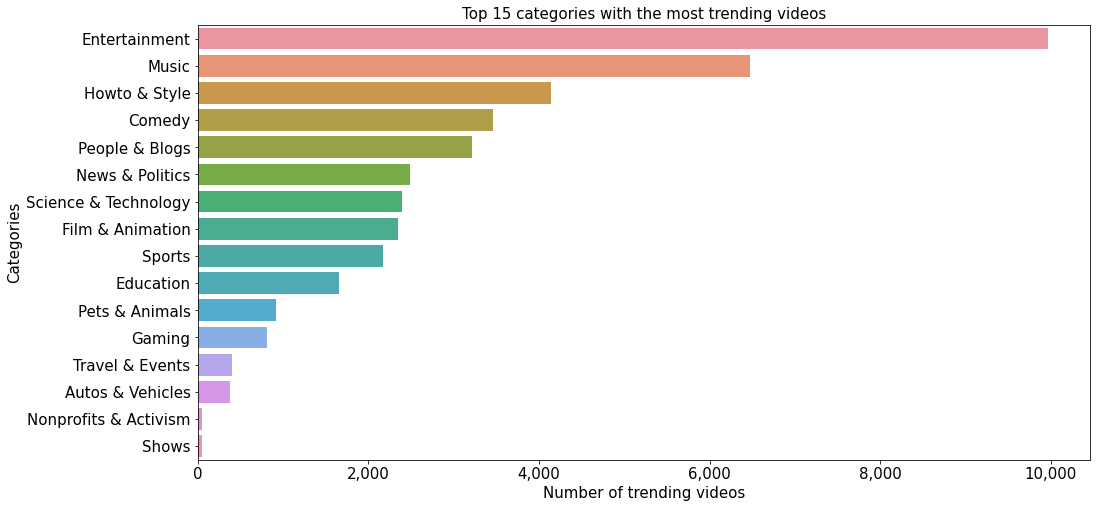

In [150]:
fig, ax = plt.subplots(figsize=(16,8))
tdf = df['category_name'].value_counts(sort=True, ascending=False)
sns.barplot(tdf.values, tdf.index.values, ax=ax)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.yticks(fontsize = 15)
plt.xticks(ind,fontsize = 15)
plt.title("Top 15 categories with the most trending videos", fontsize = 15)
plt.xlabel("Number of trending videos", fontsize = 15)
plt.ylabel("Categories", fontsize = 15)

#fig2 = df['category_name'].value_counts().plot.bar()
#fig2.set_title('Video category with the most trending videos', fontsize = 12)
#plt.xlabel('Category')
#plt.ylabel('Number of videos')

In [79]:
tdf

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

In [80]:
100*tdf/len(df)

Entertainment            24.332707
Music                    15.805026
Howto & Style            10.124789
Comedy                    8.442209
People & Blogs            7.839019
News & Politics           6.073408
Science & Technology      5.863391
Film & Animation          5.726636
Sports                    5.309043
Education                 4.044055
Pets & Animals            2.246697
Gaming                    1.995165
Travel & Events           0.981709
Autos & Vehicles          0.937752
Nonprofits & Activism     0.139198
Shows                     0.139198
Name: category_name, dtype: float64

In [81]:
tmp_publish_time = df['publish_time'].copy()
df['publish_time'] = pd.to_datetime(df['publish_time'])
df["published_day"] = df["publish_time"].dt.day_name()
df["published_hour"] = df["publish_time"].dt.hour

Text(0, 0.5, 'Number of videos')

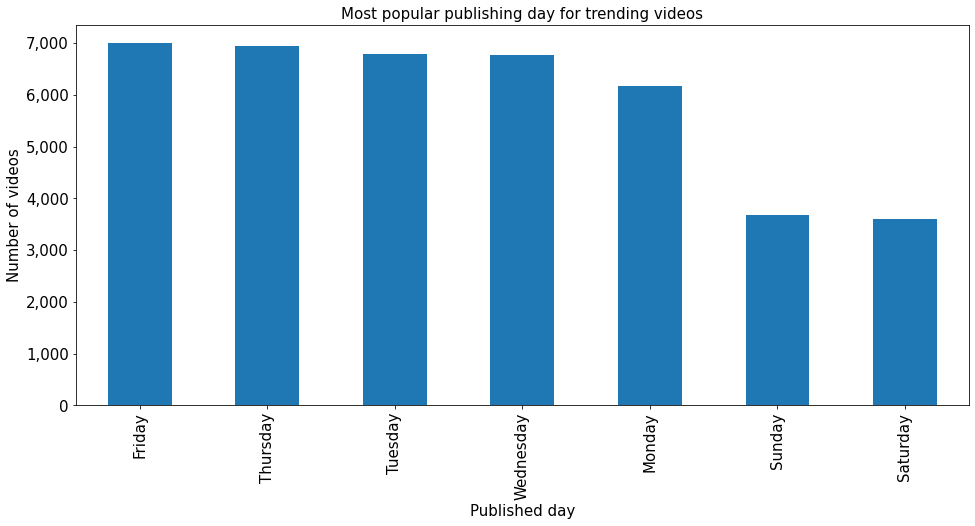

In [161]:
fig = df['published_day'].value_counts().plot.bar(figsize=(16,7))

fig.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.yticks(fontsize = 15)
plt.xticks(ind,fontsize = 15)
plt.title('Most popular publishing day for trending videos', fontsize = 15)
plt.xlabel('Published day', fontsize = 15)
plt.ylabel('Number of videos', fontsize = 15)

In [83]:
df['published_day'].value_counts()

Friday       7002
Thursday     6950
Tuesday      6786
Wednesday    6762
Monday       6177
Sunday       3679
Saturday     3593
Name: published_day, dtype: int64

Text(0, 0.5, 'Number of trending videos')

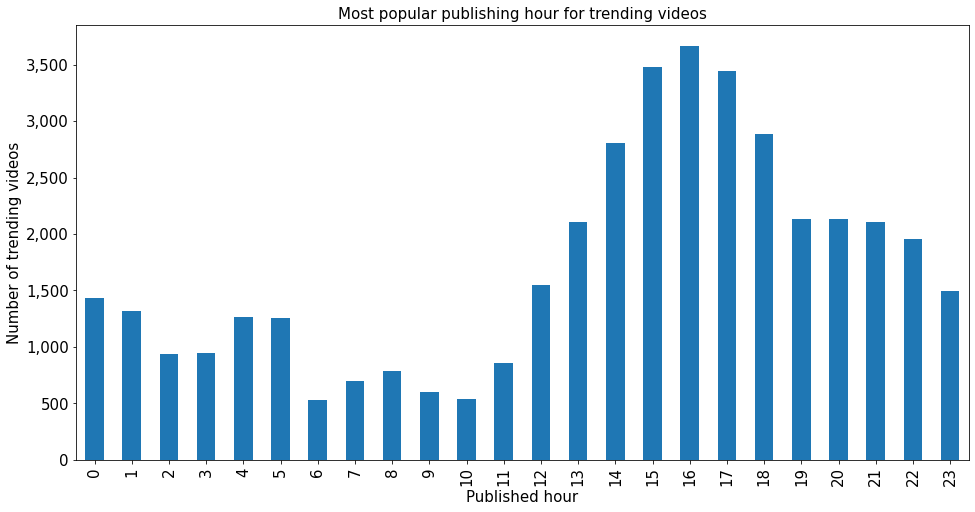

In [158]:
fig = df['published_hour'].value_counts().sort_index().plot.bar(figsize=(16,8))

fig.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.yticks(fontsize = 15)
plt.xticks(ind,fontsize = 15)
plt.title('Most popular publishing hour for trending videos', fontsize = 15)
plt.xlabel('Published hour', fontsize = 15)
plt.ylabel('Number of trending videos', fontsize = 15)

In [85]:
df['published_hour'].value_counts().sort_index()

0     1436
1     1318
2      936
3      944
4     1262
5     1253
6      531
7      700
8      790
9      605
10     541
11     856
12    1551
13    2105
14    2807
15    3483
16    3669
17    3447
18    2889
19    2132
20    2136
21    2104
22    1959
23    1495
Name: published_hour, dtype: int64

In [86]:
df['published_hour'].value_counts()

16    3669
15    3483
17    3447
18    2889
14    2807
20    2136
19    2132
13    2105
21    2104
22    1959
12    1551
23    1495
0     1436
1     1318
4     1262
5     1253
3      944
2      936
11     856
8      790
7      700
9      605
10     541
6      531
Name: published_hour, dtype: int64

In [87]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,published_hour
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,0.077981
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,-0.064916
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,-0.045296
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,-0.009750
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,-0.017421
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,-0.012056
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,0.010757
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000,0.002465
published_hour,0.077981,-0.064916,-0.045296,-0.009750,-0.017421,-0.012056,0.010757,0.002465,1.000000


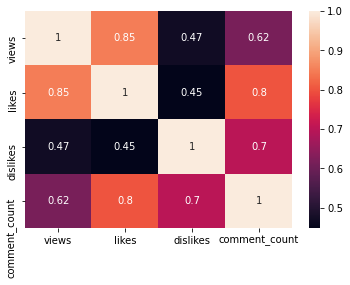

In [88]:
fig = (df.loc[:, ['views', 'likes', 'dislikes', 'comment_count']].applymap(lambda x: int(x)).dropna()).corr()

sns.heatmap(fig, annot=True)

In [89]:
# views less than 5,000,000
mdf = pd.read_csv("USvideos_modified.csv")

In [90]:
def plot_data(data):
    
    trending_video_counts = data.groupby('channel_title').count()['video_id']
    average_channel_views = data.groupby('channel_title').mean()['views'].astype('int64')
    
    data_new = pd.concat([trending_video_counts, average_channel_views], axis=1, sort=False)

    return data_new

In [91]:
new_data = plot_data(mdf)

Text(25, 437908, 'INSIDER')

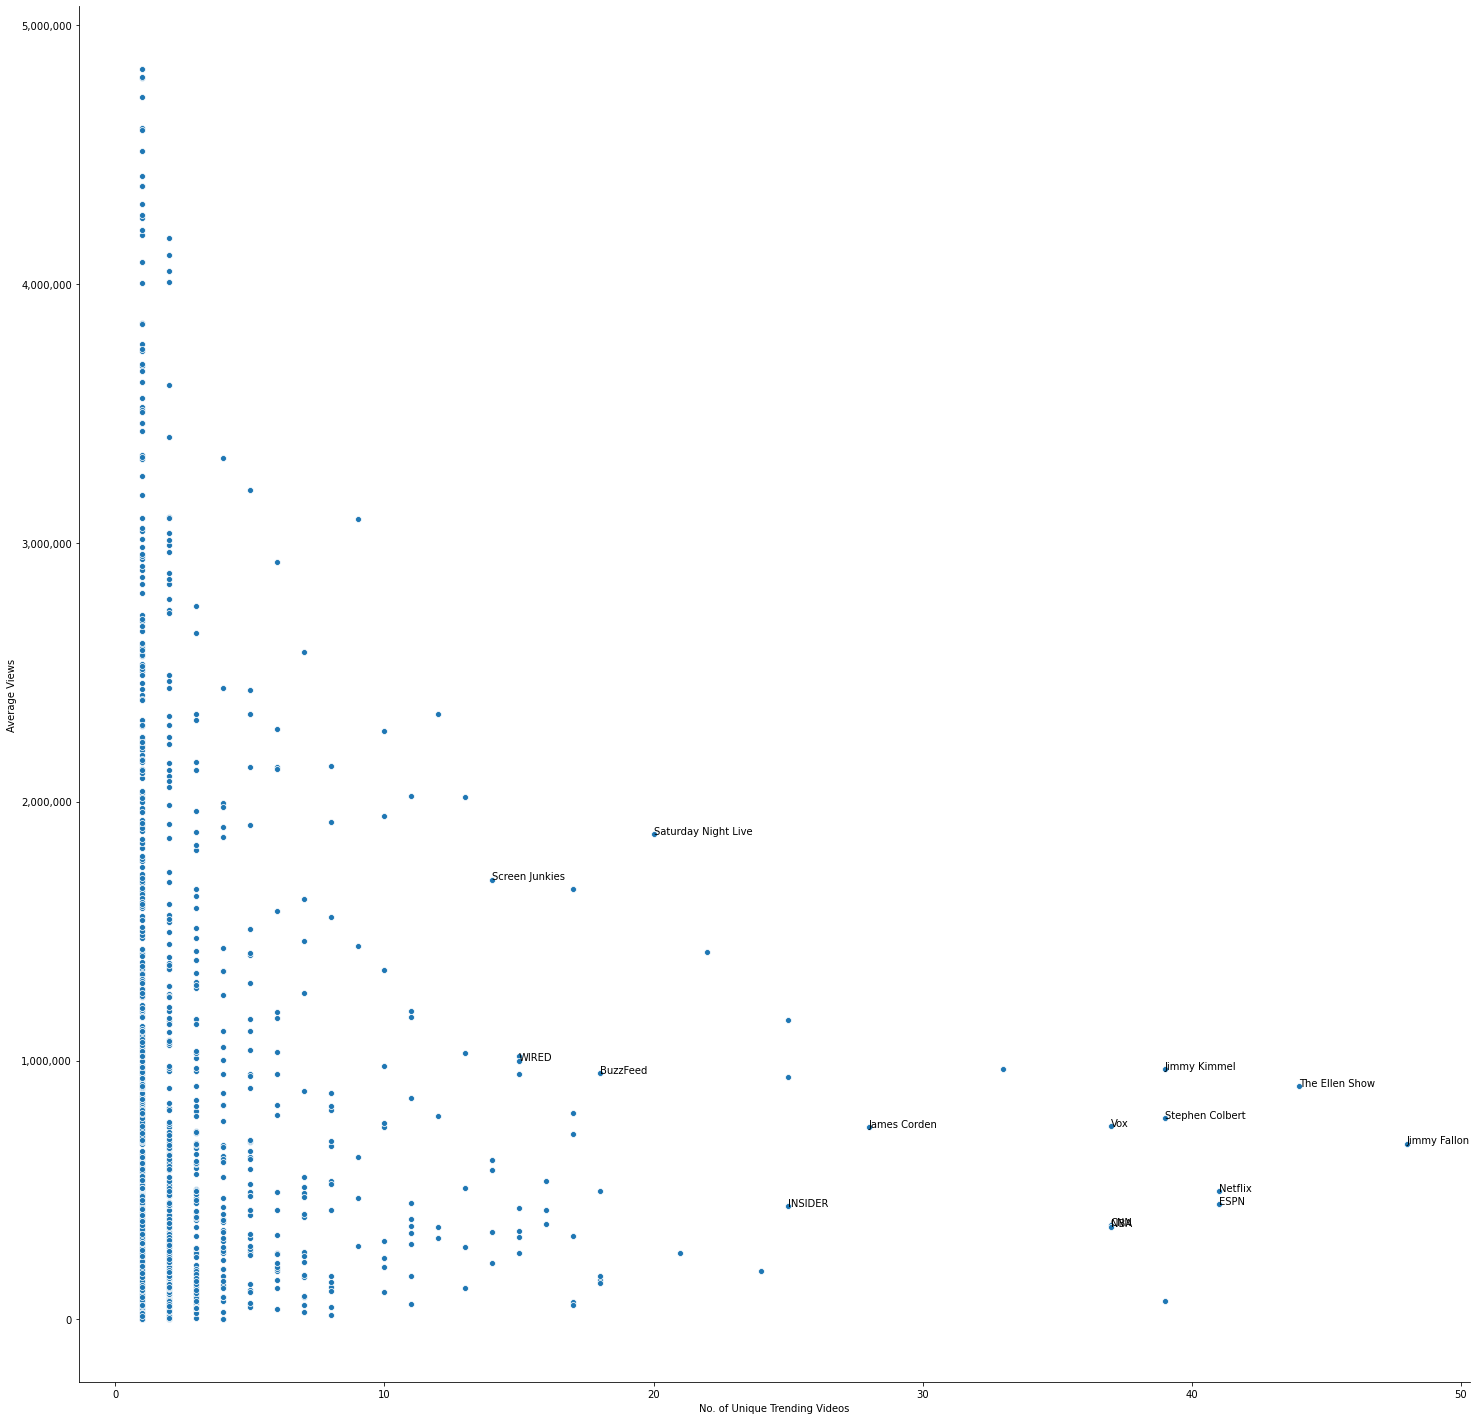

In [92]:
fig = sns.relplot(x="video_id", y="views", height=20, data=new_data)
fig.set(xlabel='No. of Unique Trending Videos', ylabel='Average Views')

plt.ticklabel_format(style='plain', axis='y')
fig.set_yticklabels(['{:,}'.format(int(x)) for x in fig.ax.get_yticks().tolist()])

plt.text(new_data.loc['ESPN', 'video_id'], new_data.loc['ESPN', 'views'], "ESPN")
plt.text(new_data.loc['The Tonight Show Starring Jimmy Fallon', 'video_id'], new_data.loc['The Tonight Show Starring Jimmy Fallon', 'views'], "Jimmy Fallon")
plt.text(new_data.loc['Vox', 'video_id'], new_data.loc['Vox', 'views'], "Vox")
plt.text(new_data.loc['TheEllenShow', 'video_id'], new_data.loc['TheEllenShow', 'views'], "The Ellen Show")
plt.text(new_data.loc['Netflix', 'video_id'], new_data.loc['Netflix', 'views'], "Netflix")
plt.text(new_data.loc['The Late Show with Stephen Colbert', 'video_id'], new_data.loc['The Late Show with Stephen Colbert', 'views'], "Stephen Colbert")
plt.text(new_data.loc['Jimmy Kimmel Live', 'video_id'], new_data.loc['Jimmy Kimmel Live', 'views'], "Jimmy Kimmel")
plt.text(new_data.loc['Late Night with Seth Meyers', 'video_id'], new_data.loc['Late Night with Seth Meyers', 'views'], "James Corden")
plt.text(new_data.loc['Screen Junkies', 'video_id'], new_data.loc['Screen Junkies', 'views'], "Screen Junkies")
plt.text(new_data.loc['NBA', 'video_id'], new_data.loc['NBA', 'views'], 'NBA')
plt.text(new_data.loc['CNN', 'video_id'], new_data.loc['CNN', 'views'], 'CNN')
plt.text(new_data.loc['Saturday Night Live', 'video_id'], new_data.loc['Saturday Night Live', 'views'], "Saturday Night Live")
plt.text(new_data.loc['WIRED', 'video_id'], new_data.loc['WIRED', 'views'], "WIRED")
plt.text(new_data.loc['BuzzFeedVideo', 'video_id'], new_data.loc['BuzzFeedVideo', 'views'], "BuzzFeed")
plt.text(new_data.loc['INSIDER', 'video_id'], new_data.loc['INSIDER', 'views'], "INSIDER")

Text(0, 0.5, 'Average number of videos')

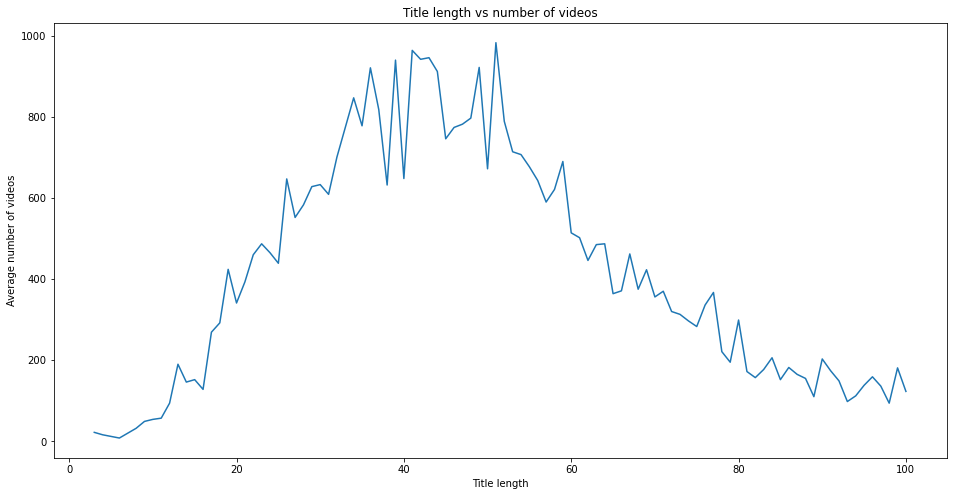

In [10]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig = df['title_length'].value_counts().sort_index().plot.line(figsize=(16,8))

plt.title('Title length vs number of videos', fontsize = 12)
plt.xlabel('Title length')
plt.ylabel('Average number of videos')

In [12]:
df["title_length"].describe()

count    40949.000000
mean        48.578183
std         19.619025
min          3.000000
25%         34.000000
50%         46.000000
75%         61.000000
max        100.000000
Name: title_length, dtype: float64

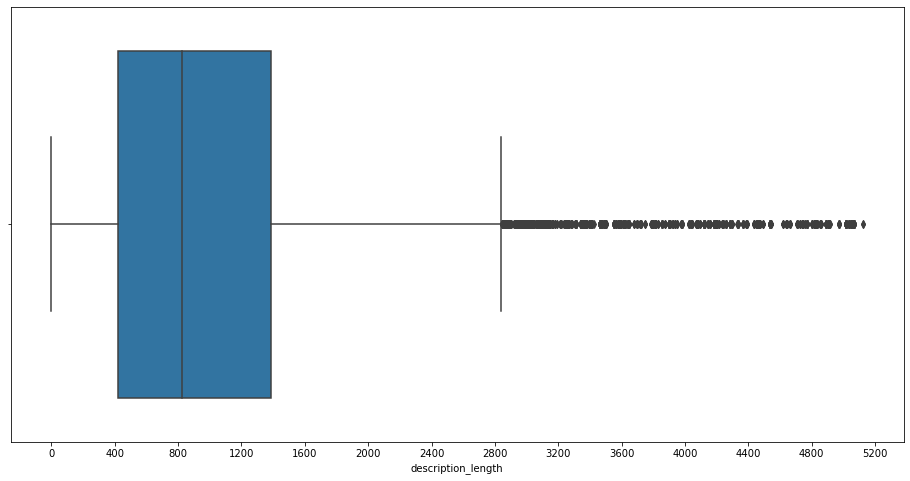

In [103]:
df['description_length'] = df['description'].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(df['description_length'], ax = ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(400))

In [109]:
df["description_length"].describe()

count    40949.000000
mean      1031.481013
std        855.040700
min          0.000000
25%        419.000000
50%        827.000000
75%       1388.000000
max       5123.000000
Name: description_length, dtype: float64

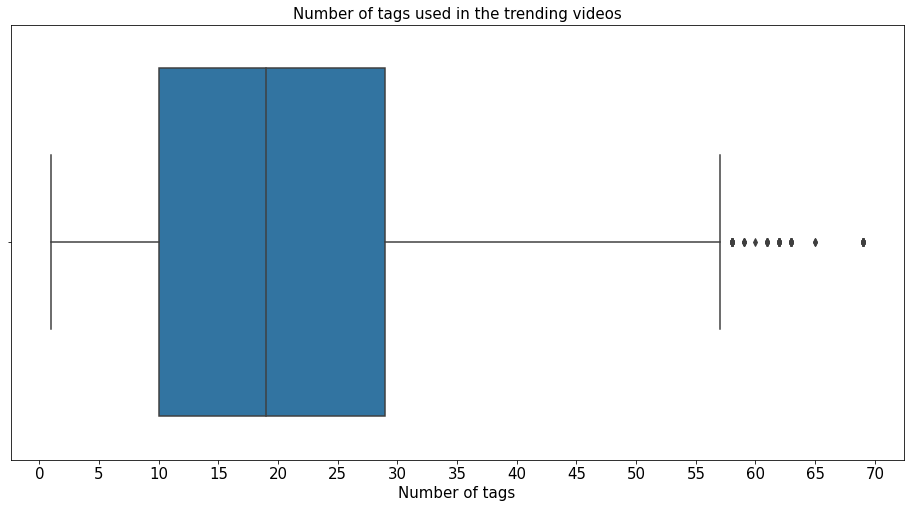

In [152]:
df['number_tags'] = df['tags'].apply(lambda x: len(x.split('|')))

fig, ax = plt.subplots(figsize = (16,8))
sns.boxplot(df['number_tags'], ax=ax)

plt.yticks(fontsize = 15)
plt.xticks(ind,fontsize = 15)
plt.title("Number of tags used in the trending videos", fontsize = 15)
plt.xlabel("Number of tags", fontsize = 15)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [134]:
100 * df[df['number_tags'] == 0].shape[0] / df.shape[0]

0.0

In [125]:
df['number_tags'].describe()

count    40949.000000
mean        19.736331
std         12.012546
min          1.000000
25%         10.000000
50%         19.000000
75%         29.000000
max         69.000000
Name: number_tags, dtype: float64

In [112]:
tags = []
for each_tag in df['tags']:
    if each_tag == '[none]': continue
    tags.extend(each_tag.split('|'))
tags_frequency = pd.Series(tags).value_counts().to_dict()

In [113]:
sorted(tags_frequency.items(), key=lambda x: x[1], reverse=True)[:15]

[('"funny"', 3584),
 ('"comedy"', 2863),
 ('"how to"', 1560),
 ('"Pop"', 1273),
 ('"2018"', 1251),
 ('"music"', 1221),
 ('"humor"', 1171),
 ('"food"', 1134),
 ('"science"', 1087),
 ('"review"', 1002),
 ('"news"', 941),
 ('"vlog"', 928),
 ('"makeup"', 924),
 ('"celebrity"', 881),
 ('"tutorial"', 864)]

In [114]:
ct_df = pd.read_csv("USvideos_common_tags.csv")

In [115]:
ct_df

,common_tags,frequency
0,funny,3584
1,comedy,2863
2,how to,1560
3,Pop,1273
4,2018,1251
5,music,1221
6,humor,1171
7,food,1134
8,science,1087
9,review,1002


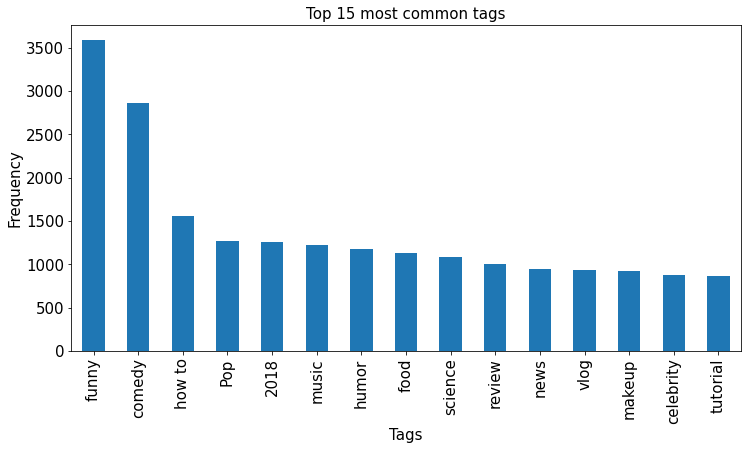

In [144]:
fig = ct_df[['common_tags', 'frequency']].sort_values(by = 'frequency', ascending = False)
ind = fig.set_index("common_tags", inplace = True)
bar = fig.plot(kind = 'bar', figsize = (12, 6), legend = None)

plt.yticks(fontsize = 15)
plt.xticks(ind,fontsize = 15)
plt.title("Top 15 most common tags", fontsize = 15)
plt.xlabel("Tags", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

plt.show()